## Pruning Decision Trees

### Cost Complexity Pruning

Mean Squared Error before pruning: 1157142857.14
17307692.307692308
Mean Squared Error after pruning: 939428571.43


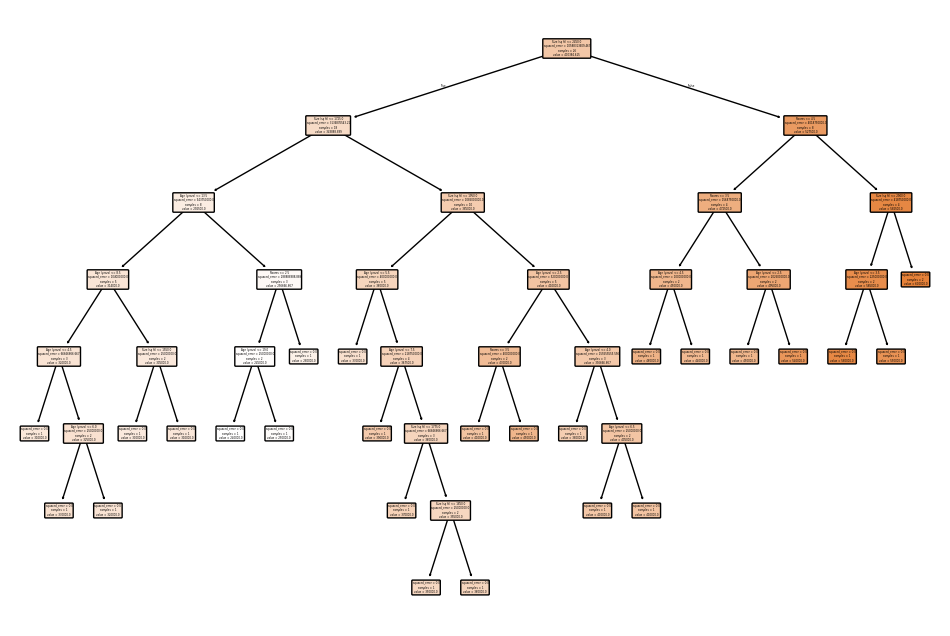

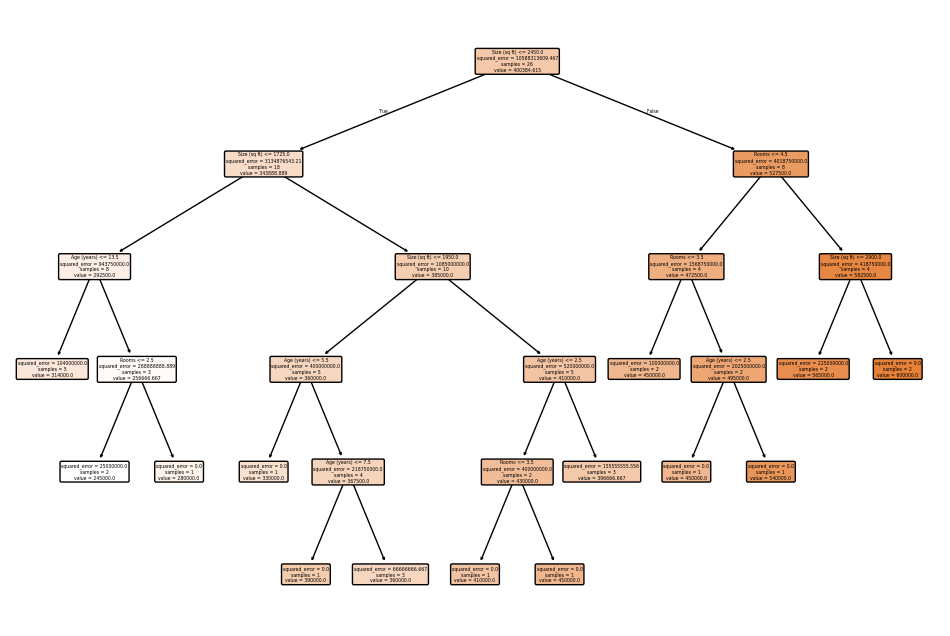

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

data = {
    'Size (sq ft)': [1500, 2000, 2500, 1800, 2200, 
                     1300, 1700, 1600, 2300, 2100, 
                     1400, 1900, 3000, 2800, 1600, 
                     2400, 1750, 1850, 1550, 2050, 
                     1900, 2400, 2200, 3000, 3500,
                     1800, 1500, 1600, 2800, 2900, 
                     3200, 2000, 2300],
    'Rooms': [3, 4, 4, 3, 4, 
              2, 3, 3, 5, 4, 
              2, 3, 5, 5, 3, 
              4, 3, 4, 3, 4, 
              3, 4, 4, 3, 2,
              3, 2, 3, 5, 4, 
              5, 4, 3],
    'Age (years)': [10, 5, 2, 15, 8, 
                    20, 7, 12, 1, 4, 
                    18, 9, 3, 6, 15, 
                    2, 14, 10, 5, 8, 
                    6, 3, 2, 8, 1,
                    5, 2, 4, 1, 3, 
                    10, 4, 2],
    'Price (in $)': [300000, 400000, 450000, 350000, 410000, 
                     250000, 320000, 310000, 480000, 430000, 
                     240000, 360000, 600000, 550000, 280000, 
                     500000, 370000, 390000, 330000, 420000, 
                     390000, 380000, 450000, 440000, 460000,
                     330000, 290000, 310000, 580000, 540000, 
                     600000, 390000, 410000]
}


# Create DataFrame
df = pd.DataFrame(data)

# Split the dataset into features and target
X = df[['Size (sq ft)', 'Rooms', 'Age (years)']]
y = df['Price (in $)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Function to compute misclassification rate
def misclassification_rate(y_true, y_pred):
    # Assuming this is regression, we calculate an error threshold
    threshold = 10000  # Define a threshold for classification
    return np.mean(np.abs(y_true - y_pred) > threshold)

# Predictions before pruning
y_pred_before_pruning = tree.predict(X_test)
mse_before = mean_squared_error(y_test, y_pred_before_pruning)
misclassification_before = misclassification_rate(y_test, y_pred_before_pruning)

print(f"Mean Squared Error before pruning: {mse_before:.2f}")
# print(f"Misclassification rate before pruning: {misclassification_before:.2f}")

# Apply cost complexity pruning
ccp_alphas = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = ccp_alphas.ccp_alphas[11]  # Use the maximum alpha for illustration
print(ccp_alpha)
pruned_tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
pruned_tree.fit(X_train, y_train)

# Predictions after pruning
y_pred_after_pruning = pruned_tree.predict(X_test)
mse_after = mean_squared_error(y_test, y_pred_after_pruning)
misclassification_after = misclassification_rate(y_test, y_pred_after_pruning)

print(f"Mean Squared Error after pruning: {mse_after:.2f}")
# print(f"Misclassification rate after pruning: {misclassification_after:.2f}")

# Visualize the tree before pruning
plt.figure(figsize=(12, 8))
plt.title("Decision Tree Before Pruning")
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# Visualize the tree after pruning
plt.figure(figsize=(12, 8))
plt.title("Decision Tree After Pruning")
plot_tree(pruned_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()


### Reduced Errror Pruning

Initial Validation Error: 14040000000.00


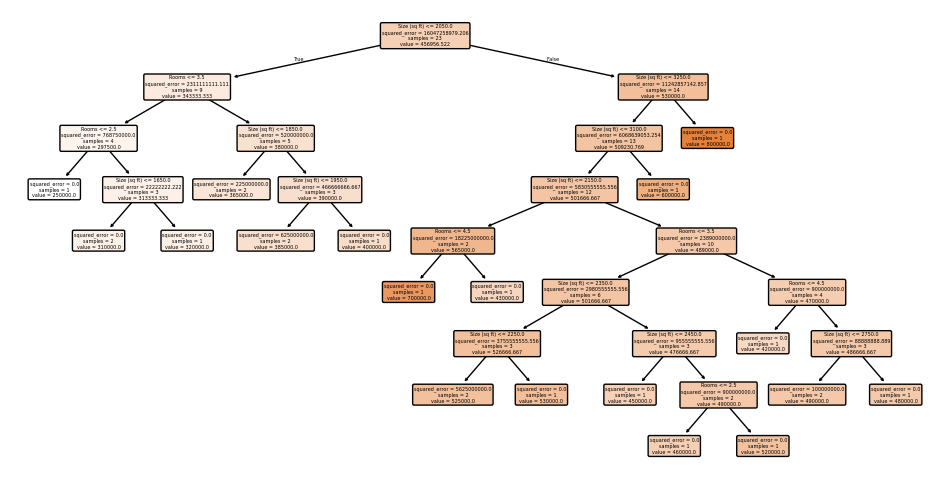

Final Validation Error after pruning: 14040000000.00
Test Predictions:
[320000. 420000. 420000. 520000. 320000.]


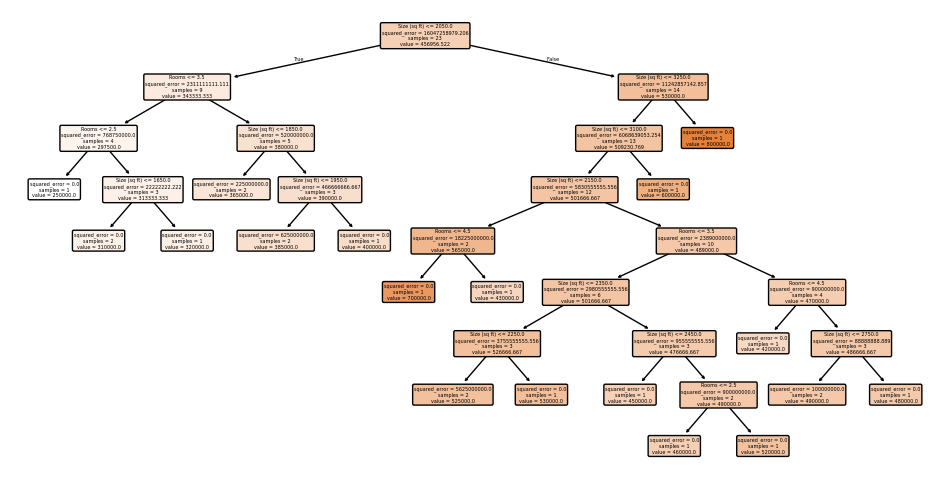

In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# New sample dataset
data = {
    'Size (sq ft)': [1500, 1700, 2000, 2500, 1800, 
                     2200, 1300, 1600, 3000, 2800, 
                     3200, 1500, 1700, 1900, 2500, 
                     2300, 2100, 2000, 1800, 1600, 
                     1900, 1700, 2200, 2400, 2600,
                     3000, 2800, 2500, 2300, 2200,
                     2100, 3100, 3300],
    'Rooms': [3, 3, 4, 5, 4, 
              3, 2, 3, 5, 4, 
              4, 3, 3, 4, 5, 
              4, 5, 3, 4, 3, 
              4, 3, 4, 3, 2,
              5, 4, 3, 2, 3, 
              4, 3, 5],
    'Price (in $)': [300000, 320000, 400000, 500000, 350000, 
                     450000, 250000, 310000, 600000, 550000, 
                     600000, 310000, 320000, 360000, 480000, 
                     450000, 430000, 500000, 380000, 390000, 
                     410000, 390000, 420000, 450000, 460000,
                     480000, 550000, 520000, 530000, 600000, 
                     700000, 720000, 800000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split the dataset into features and target
X = df[['Size (sq ft)', 'Rooms']]
y = df['Price (in $)']

# Split the dataset into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% train, 30% temp for validation
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% val, 15% test

# Build the decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Function to calculate validation error
def calculate_validation_error(tree, X_val, y_val):
    y_pred = tree.predict(X_val)
    return mean_squared_error(y_val, y_pred)

# Initial validation error
initial_validation_error = calculate_validation_error(tree, X_val, y_val)
print(f"Initial Validation Error: {initial_validation_error:.2f}")

# Reduced Error Pruning
def reduced_error_pruning(tree, X_val, y_val, initial_error):
    # For each leaf node, check if pruning improves validation error
    leaves = tree.apply(X_train)  # Get the leaf indices for training data
    for leaf in np.unique(leaves):
        # Get the indices of training samples in the current leaf
        indices = np.where(leaves == leaf)[0]
        
        # Make a copy of the original tree
        tree_copy = DecisionTreeRegressor(random_state=42)
        tree_copy.fit(X_train, y_train)

        # Predict the mean target value of the current leaf
        leaf_prediction = np.mean(y_train.iloc[indices])
        
        # Replace predictions in this leaf with the leaf prediction
        y_train_pred = tree_copy.predict(X_train)
        y_train_pred[indices] = leaf_prediction

        # Calculate validation error after pruning
        pruned_validation_error = calculate_validation_error(tree_copy, X_val, y_val)

        # If validation error is reduced, keep the pruned tree
        if pruned_validation_error < initial_error:
            print(f"Pruning leaf {leaf} improved validation error.")
            tree = tree_copy
            initial_error = pruned_validation_error

    return tree

# Display the tree before pruning
plt.figure(figsize=(12, 6))
plt.title("Decision Tree Before Pruning")
plot_tree(tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# Apply reduced error pruning
pruned_tree = reduced_error_pruning(tree, X_val, y_val, initial_validation_error)

# Final validation error after pruning
final_validation_error = calculate_validation_error(pruned_tree, X_val, y_val)
print(f"Final Validation Error after pruning: {final_validation_error:.2f}")

# Predictions on the test set
y_test_pred = pruned_tree.predict(X_test)

# Display the predictions
print("Test Predictions:")
print(y_test_pred)

# Display the tree after pruning
plt.figure(figsize=(12, 6))
plt.title("Decision Tree After Pruning")
plot_tree(pruned_tree, filled=True, feature_names=X.columns, rounded=True)
plt.show()
